In [17]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']

# Do not hide any columns
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', font_scale=1)

In [16]:
results_path = 'results_combined_Apr1'
images_dir = f'{results_path}/images'

os.makedirs(images_dir, exist_ok=True)

In [9]:
def process_results(results_path: str, ext: str = 'feather'):
    results_list = []

    # Read all the results from results/ directory
    for dirname in tqdm(os.listdir(results_path), desc='Reading results'):
        if 'results' in dirname:
            if not os.path.isdir(f'{results_path}/{dirname}'):
                continue
            for file in os.listdir(f'{results_path}/{dirname}/results'):
                if file.endswith(f'.{ext}'):
                    df = pd.read_feather(f'{results_path}/{dirname}/results/{file}')
                    
                    # Custom parsing kinda weird
                    if 'dt' in dirname:
                        df['base_model'] = 'DecisionTree'
                    else:
                        df['base_model'] = 'NeuralNetwork'
                        
                    if 'dice' in dirname:
                        df['base_cf_method'] = 'Dice'
                    else:
                        df['base_cf_method'] = 'GrowingSpheres'
                        
                    results_list.append(df)
    
    # Concatenate all the results
    raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
    return raw_df

In [10]:
raw_df = process_results(results_path)

Reading results: 100%|██████████| 22/22 [00:22<00:00,  1.01s/it]


In [11]:
raw_df.head(3)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta,base_model,base_cf_method
0,Architecture,fico,32,2,Architecture,0.95,0.8,Model2_11,"[0.5769230769230771, 0.8250428816466553, 0.061...",0,0.18343,0,0.171645,0,"[0.5351396252148047, 0.7647639808042765, 0.021...",0.514667,1,0.334778,0,1,2.515721,0.648996,0.918981,0.266667,0,0.014368,"[0.5195899739534725, 0.7621384475054742, 0.003...",0.548310,1.0,0.468786,0.0,1.0,2.736325,0.690158,0.932044,0.333333,0.0,0.292803,0.005436,2.184463,0,0,0,0,0.863086,0.863086,0.996607,NeuralNetwork,GrowingSpheres
1,Architecture,fico,32,2,Architecture,0.95,0.8,Model2_12,"[0.5769230769230771, 0.8250428816466553, 0.061...",0,0.18343,0,0.156193,0,"[0.5351396252148047, 0.7647639808042765, 0.021...",0.514667,1,0.334778,0,1,2.515721,0.648996,0.918981,0.266667,0,0.014368,"[0.5339811311700196, 0.7661833699939237, -0.02...",0.560462,1.0,0.405027,0.0,1.0,2.668759,0.705565,0.936603,0.266667,0.0,0.362274,0.010284,4.289001,0,0,0,0,0.863086,0.863086,0.996607,NeuralNetwork,GrowingSpheres
2,Architecture,fico,32,2,Architecture,0.95,0.8,Model2_13,"[0.5769230769230771, 0.8250428816466553, 0.061...",0,0.18343,0,0.177832,0,"[0.5351396252148047, 0.7647639808042765, 0.021...",0.514667,1,0.334778,0,1,2.515721,0.648996,0.918981,0.266667,0,0.014368,"[0.5216612588584364, 0.7620860775340356, 0.015...",0.555204,1.0,0.551388,1.0,1.0,2.677049,0.706990,0.913975,0.333333,1.0,0.327329,0.008590,2.166249,0,0,0,0,0.814280,0.814280,0.986785,NeuralNetwork,GrowingSpheres


In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579404 entries, 0 to 579403
Data columns (total 49 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   experiment_type                                 579404 non-null  object 
 1   dataset_name                                    579404 non-null  object 
 2   k_mlps_in_B                                     579404 non-null  int64  
 3   fold_i                                          579404 non-null  int64  
 4   experiment_generalization_type                  579404 non-null  object 
 5   beta_confidence                                 579404 non-null  float64
 6   delta_robustness                                579404 non-null  float64
 7   model2_name                                     579404 non-null  object 
 8   x_test_sample                                   579404 non-null  object 
 9   y_test_sample             

In [13]:
raw_df['base_model'].value_counts()

NeuralNetwork    459000
DecisionTree     120404
Name: base_model, dtype: int64

In [14]:
raw_df['base_cf_method'].value_counts()

GrowingSpheres    437802
Dice              141602
Name: base_cf_method, dtype: int64

In [2]:
# Reverse engineer the beta distribution parameters
# import scipy.stats as stats

# lb = 0.516128
# ub = 0.826645
# alpha = 0.95
# k = 32
# prior_a = 0.5
# prior_b = 0.5

# def find_beta_params(lb, ub, alpha, k, prior_a, prior_b):
#     # Find parameters of the beta distribution that result in the given credible interval
#     for a in range(k):
#         b = k - a
#         lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)
        
#         if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#             # print(f'Found a = {a}, b = {b}')
#             break
        
#     return a, b

# # find_beta_params(lb, ub, alpha, k, prior_a, prior_b)

# lbs = raw_df['lower_bound_beta']
# ubs = raw_df['upper_bound_beta']

# import multiprocessing


# def mp_find_beta_params(lb: list, ub: list, alpha: float, k: int, prior_a: float, prior_b: float, workers: int = 4):
    
#     def find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b):
        
#         r = []
#         for i, (lb, ub) in enumerate(zip(lbs, ubs)):
#             # Find parameters of the beta distribution that result in the given credible interval
#             for a in range(k):
#                 b = k - a
#                 lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)

#                 if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#                     r.append((a, b))
#                     break
#             if i % 1000 == 0:
#                 print(f'Processed {i} elements')
#         return r
    
#     processes = []
    
#     for i in range(workers):
#         n = len(lb)
#         chunks = np.array_split(np.arange(n), workers)
        
#         lb_part = lb[chunks[i]]
#         ub_part = ub[chunks[i]]
        
#         print(f'Processing {len(lb_part)} elements')
        
#         p = multiprocessing.Process(target=find_beta_params, args=(lb_part, ub_part, alpha, k, prior_a, prior_b))
#         processes.append(p)
#         p.start()
        
#     results = []
    
#     for p in processes:
#         p.join()
#         results.append(p)
    
#     return results

# results = mp_find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b, workers=4)

# raw_df['beta_alpha'], raw_df['beta_beta'] = zip(*results)


# raw_df['beta_alpha'] = raw_df['beta_alpha'].astype(int)
# raw_df['beta_beta'] = raw_df['beta_beta'].astype(int)

# raw_df['beta_alpha'].value_counts()

In [21]:
nn_gs_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
nn_dice_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'Dice')]
nn_df = raw_df[raw_df['base_model'] == 'NeuralNetwork']
dt_gs_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
dt_dice_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'Dice')]
dt_df = raw_df[raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}')

Lengths of the dataframes: NN GS: 378000, NN Dice: 81000, DT GS: 59802, DT Dice: 60602


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

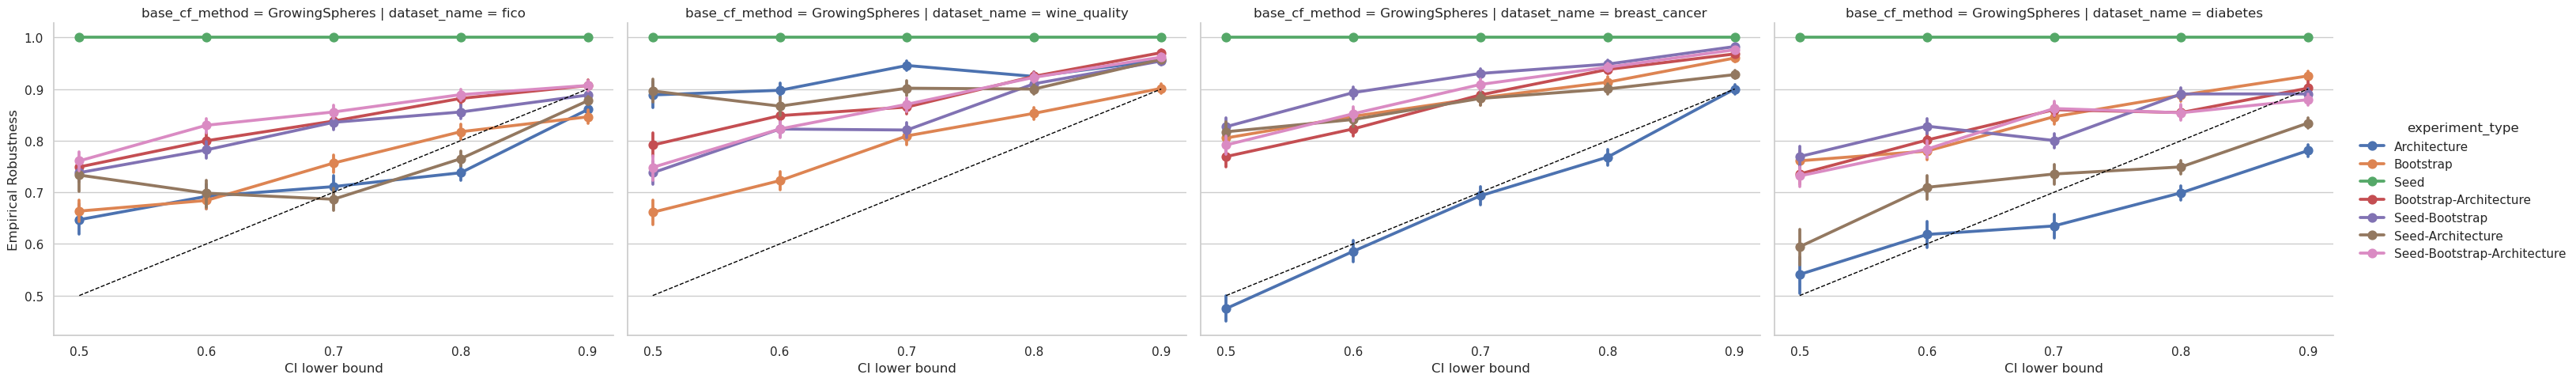

In [40]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = nn_gs_df.copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
_tmp_df['CI lower bound'] = pd.cut(_tmp_df['lower_bound_beta'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['CI midpoint'] = (_tmp_df['lower_bound_beta'] + _tmp_df['upper_bound_beta']) / 2
_tmp_df['CI midpoint'] = pd.cut(_tmp_df['CI midpoint'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['Empirical Robustness'] = _tmp_df['robust_counterfactual_validity_model2'].astype(float)


g = sns.catplot(data=_tmp_df, 
            x='CI lower bound',
            y='Empirical Robustness',
            hue='experiment_type', 
            col='dataset_name', 
            row='base_cf_method',
            kind='point', 
            # palette=colors_discrete, 
            # markers=markers, 
            height=5, 
            aspect=1.5,
)
for ax in g.axes.flat:
    ax.plot(list(range(5)), lb_threshs[:-1], color='black', linestyle='--', linewidth=1, label='Lower bound')


plt.savefig(f'{images_dir}/1_robustness_vs_ci_lower_bound.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

/tmp/ipykernel_20015/3504213179.py:95: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


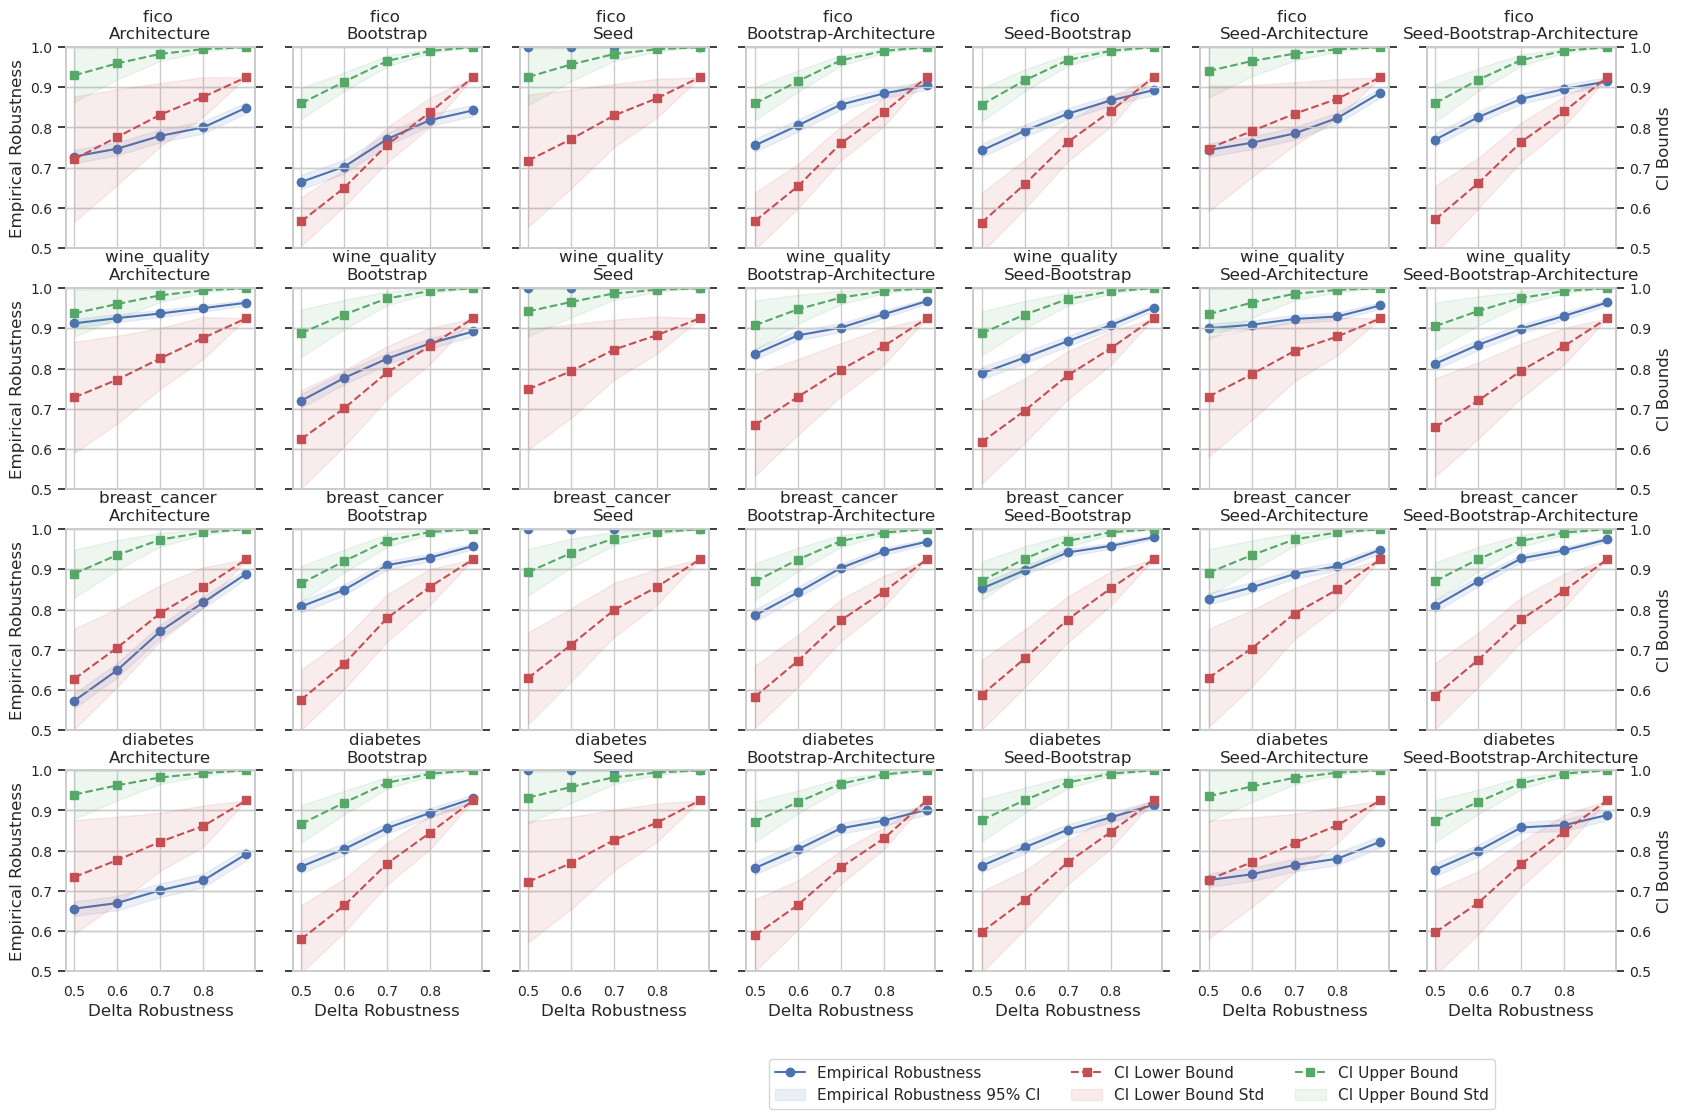

In [75]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_gs_df.copy()

datasets = _tmp_df['dataset_name'].unique()
experiment_types = _tmp_df['experiment_type'].unique()
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(experiment_types), figsize=(20, 12), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
        ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
        
        ax.set_title(f'{dataset} \n{experiment_type}')
        
        if i == len(datasets) - 1:
            ax.set_xlabel('Delta Robustness')
        # ax.set_xlabel('Delta Robustness')
        if j == 0:
            ax.set_ylabel('Empirical Robustness')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        # add yerr for lower bound
        lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        # add yerr
        ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
        
        
        if j == len(experiment_types) - 1:
            ax2.set_ylabel('CI Bounds')
        
        # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='lower_bound_beta', ax=ax2, color='r', alpha=0.5)
        # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='upper_bound_beta', ax=ax2, color='g', alpha=0.5)
        
        l = 0.5
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8])
        # Make x-axis labels more coarse i.e. only show rounded to tenths
        

        
        # ax_lim = ax.get_xlim()
        # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
        
        if i == 1 and j == 0:
            ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
            ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
            
            ax.legend(ax_legend_handles + ax2_legend_handles, ax_legend_labels + ax2_legend_labels, ncol=3, bbox_to_anchor=(7.6, -2.8))
            
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
            
        


plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [42]:
robx_results_path = results_path + '/robx'
robx_raw_df = process_results(robx_results_path)

Reading results: 100%|██████████| 6/6 [00:29<00:00,  4.96s/it]


In [43]:
robx_raw_df.head(3)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,base_model,base_cf_method
0,Architecture,fico,32,1,Architecture,0.5,0.1,Model2_11,"[0.5094339622641509, 0.2707964601769911, 0.015...",0,0.107052,0,0.154468,0,"[0.5094339622641509, 0.2707964601769911, 0.015...",0.570142,1,0.587248,1,1,1.619526,1.152266,0.913642,0.533333,1,0.166199,"[0.781320329851132, 0.47118805600911506, 0.142...",0.768958,1.0,0.790490,1.0,1.0,4.568437,1.369972,0.629106,0.733333,1.0,3.175778,0.588829,1.728497,NeuralNetwork,Dice
1,Architecture,fico,32,1,Architecture,0.5,0.1,Model2_12,"[0.5094339622641509, 0.2707964601769911, 0.015...",0,0.107052,0,0.150520,0,"[0.5094339622641509, 0.2707964601769911, 0.015...",0.570142,1,0.587248,1,1,1.619526,1.152266,0.913642,0.533333,1,0.166199,"[0.758044343040405, 0.3392046499079913, 0.0424...",0.769096,1.0,0.833800,1.0,1.0,4.745955,1.465955,0.630485,0.800000,1.0,3.126429,0.699320,0.972858,NeuralNetwork,Dice
2,Architecture,fico,32,1,Architecture,0.5,0.1,Model2_13,"[0.5094339622641509, 0.2707964601769911, 0.015...",0,0.107052,0,0.117296,0,"[0.5094339622641509, 0.2707964601769911, 0.015...",0.570142,1,0.587248,1,1,1.619526,1.152266,0.913642,0.533333,1,0.166199,"[0.781320329851132, 0.47118805600911506, 0.142...",0.768958,1.0,0.830251,1.0,1.0,4.568437,1.369972,0.629106,0.733333,1.0,3.175778,0.588829,1.882773,NeuralNetwork,Dice


In [46]:
robx_raw_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'}, inplace=True)

In [47]:
robx_nn_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_nn_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_nn_df = robx_raw_df[robx_raw_df['base_model'] == 'NeuralNetwork']
robx_dt_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_dt_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_dt_df = robx_raw_df[robx_raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}')

Lengths of the dataframes: NN GS: 445501, NN Dice: 162000, DT GS: 44901, DT Dice: 49201


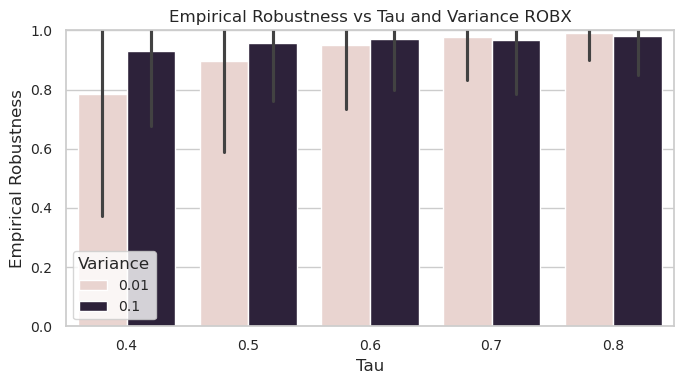

In [48]:
fig, ax = plt.subplots(figsize=(7, 4))
# Change font size
sns.set_theme(style='whitegrid', font_scale=1)
sns.barplot(data=robx_raw_df, x='tau', y='robust_counterfactual_validity_model2', hue='variance', errorbar='sd')
plt.title('Empirical Robustness vs Tau and Variance ROBX')
plt.ylabel('Empirical Robustness')
plt.xlabel('Tau')
plt.ylim(0, 1)

# Change font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Change legend font size
plt.legend(fontsize=10, title='Variance')

plt.tight_layout()
plt.savefig(f'{images_dir}/3_empirical_robustness_vs_tau_variance.png', dpi=300, bbox_inches='tight')

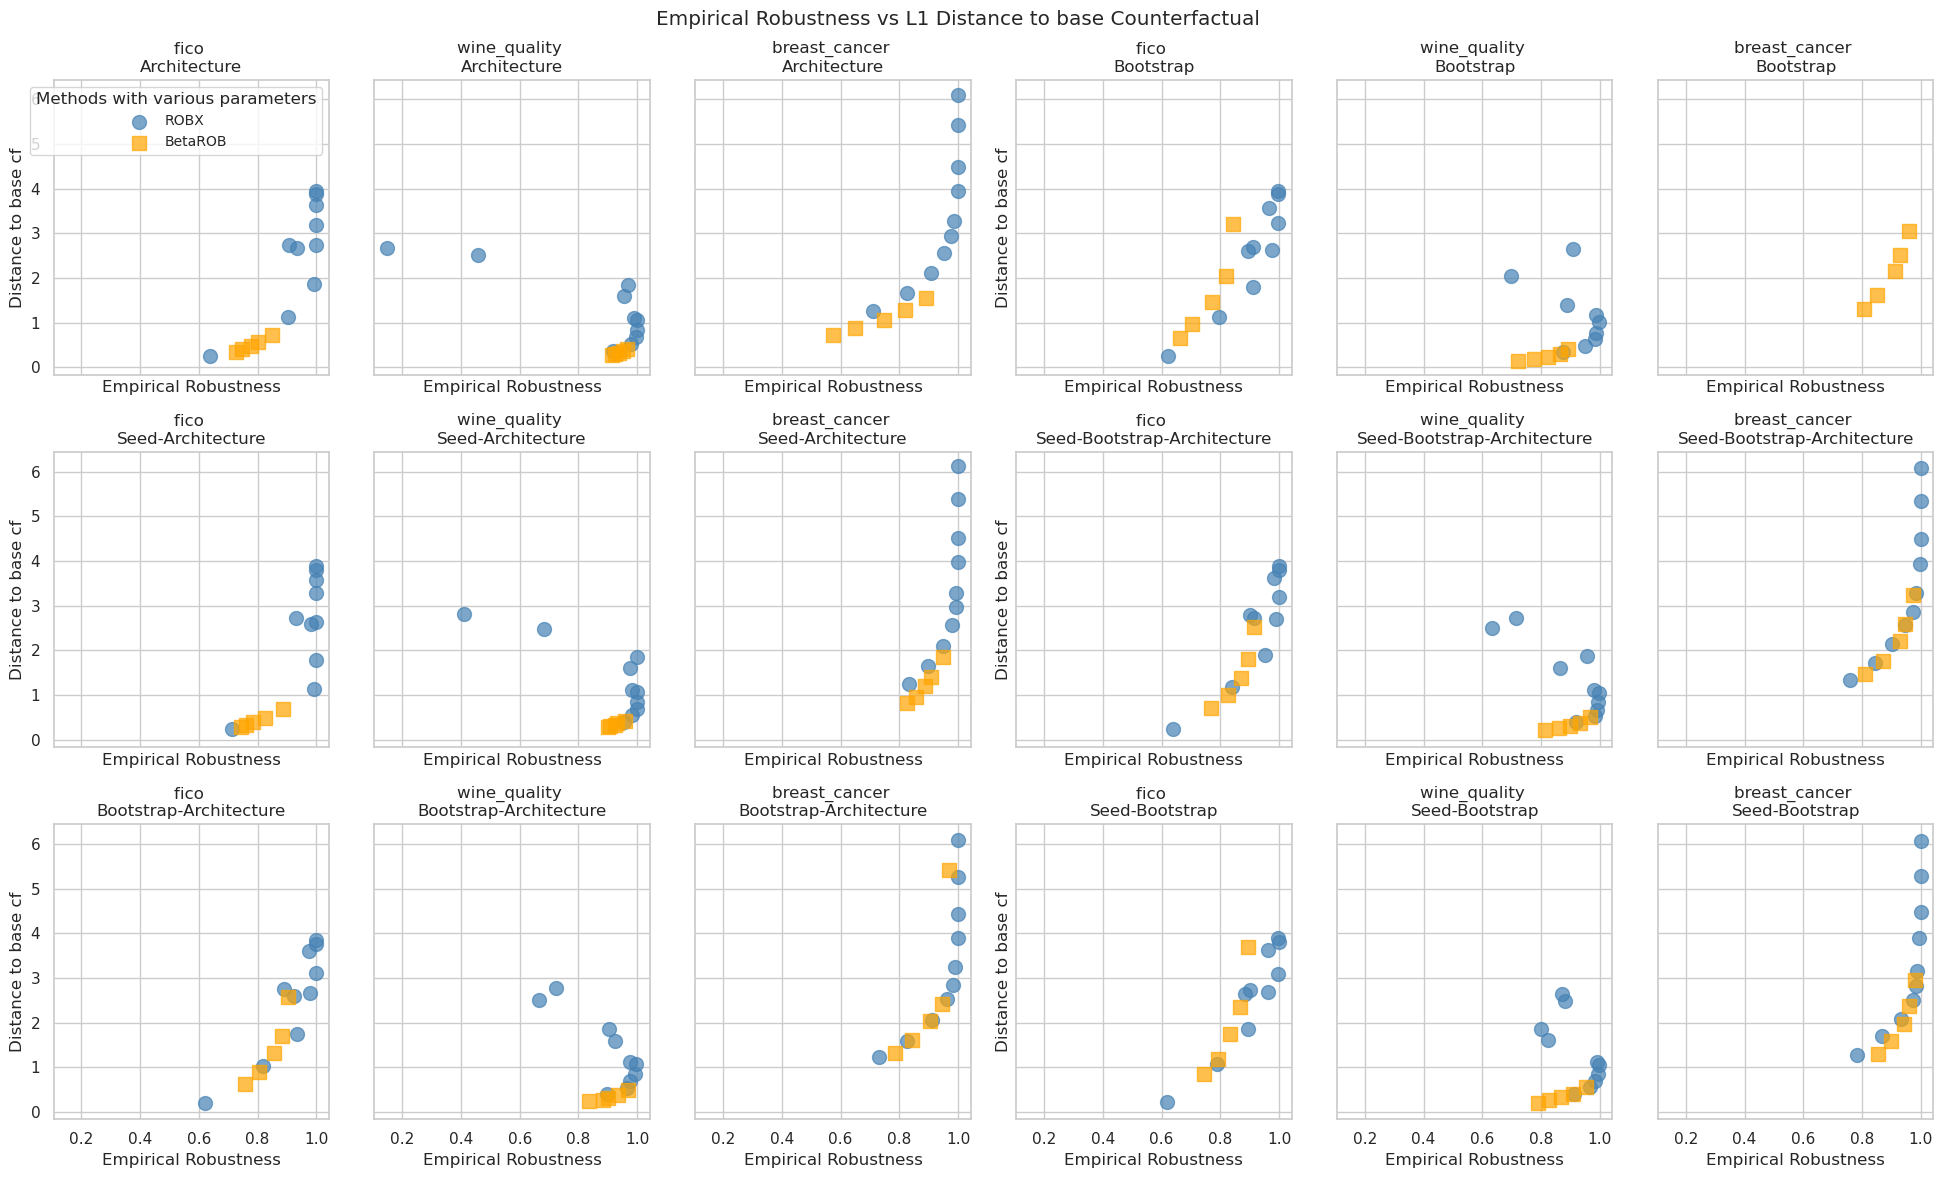

In [54]:
_robx_tmp_df = robx_nn_gs_df.copy()
_betarob_tmp_df = nn_gs_df.copy()


datasets = _robx_tmp_df['dataset_name'].unique()
experiment_types = _robx_tmp_df['experiment_type'].unique()

rows = len(experiment_types) // 2
cols = len(datasets) + len(experiment_types) // 2 + len(experiment_types) % 2

fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 12), sharex=True, sharey=True)




ax = axes.flatten()
ite = 0
for i, experiment_type in enumerate(experiment_types):
    for j, dataset in enumerate(datasets):
        
        
        tmp_robx_df = _robx_tmp_df.copy()
        tmp_robx_df = tmp_robx_df[(tmp_robx_df['dataset_name'] == dataset) & (tmp_robx_df['experiment_type'] == experiment_type)]
        tmp_robx_df['robust_counterfactual_validity_model2'] = tmp_robx_df['robust_counterfactual_validity_model2'].astype(float)
        robx_agg_empirical = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_validity_model2'].mean().reset_index()
        robx_agg_dist_to_baseline = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()
        
        tmp_raw_df = _betarob_tmp_df.copy()
        tmp_raw_df = tmp_raw_df[(tmp_raw_df['dataset_name'] == dataset) & (tmp_raw_df['experiment_type'] == experiment_type)]
        tmp_raw_df['robust_counterfactual_validity_model2'] = tmp_raw_df['robust_counterfactual_validity_model2'].astype(float)
        betarob_agg_empirical = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_validity_model2'].mean().reset_index()  
        betarob_agg_dist_to_baseline = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()


        # Create scatter plot of dist vs empirical for both ROBX and BetaROB
        robx_merge = pd.merge(robx_agg_empirical, robx_agg_dist_to_baseline, on=['tau', 'variance'], suffixes=('_empirical', '_dist'))
        robx_merge['tau_var'] = robx_merge['tau'].astype(str) + '_' + robx_merge['variance'].astype(str)

        betarob_merge = pd.merge(betarob_agg_empirical, betarob_agg_dist_to_baseline, left_on=['delta_robustness', 'beta_confidence'], right_on=['delta_robustness', 'beta_confidence'], suffixes=('_empirical', '_dist'))
        betarob_merge['delta_beta'] = betarob_merge['delta_robustness'].astype(str) + '_' + betarob_merge['beta_confidence'].astype(str)
        
        ax[ite].scatter(x=robx_merge['robust_counterfactual_validity_model2'],
                    y=robx_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='steelblue',
                    marker='o',
                    s=100,
                    # cmap='tab10',
                    label='ROBX',
                    alpha=0.7
        )
        
        ax[ite].scatter(x=betarob_merge['robust_counterfactual_validity_model2'],
                    y=betarob_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='orange',
                    marker='s',
                    s=100,
                    # cmap='tab10',
                    label='BetaROB',
                    alpha=0.7
        )
        

        ax[ite].set_xlabel('Empirical Robustness')
        
        if j == 0:
            ax[ite].set_ylabel('Distance to base cf')
        ax[ite].set_title(f'{dataset} \n{experiment_type}')
        
        if i == 0 and j == 0:
            ax[ite].legend(title='Methods with various parameters', fontsize=10)
            
            
        # # Add labels to the points
        # for k, row in robx_merge.iterrows():
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.04, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'], 
        #                  row['tau'], 
        #                  fontsize=9, 
        #                  alpha=0.5
        #     )
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.02, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'], 
        #                  row['variance'], 
        #                  fontsize=9, 
        #                  alpha=0.5
        #     )
        # for k, row in betarob_merge.iterrows():
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.035, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'], 
        #                  row['delta_robustness'], 
        #                  fontsize=9, 
        #                  alpha=0.9,
        #                  color='#ffa500',
        #     )
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.01, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'] , 
        #                  row['beta_confidence'], 
        #                  fontsize=9, 
        #                  alpha=0.9,
        #                 color='#ffa500',
        #     )
        
        ite += 1
            


plt.suptitle('Empirical Robustness vs L1 Distance to base Counterfactual')
plt.tight_layout()

plt.savefig(f'{images_dir}/3_empirical_robustness_vs_l1_distance.png', dpi=300, bbox_inches='tight')


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [55]:

conf_sweep_results_path = results_path + '/conf_sweep'
conf_sweep_raw_df = process_results(conf_sweep_results_path)

Reading results: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


In [57]:
conf_sweep_raw_df['beta_confidence'].value_counts()

0.90    12150
0.95    12150
0.99    12150
0.70    12150
0.80    12150
Name: beta_confidence, dtype: int64

In [58]:
conf_sweep_raw_df['delta_robustness'].value_counts()

0.7    20250
0.8    20250
0.9    20250
Name: delta_robustness, dtype: int64

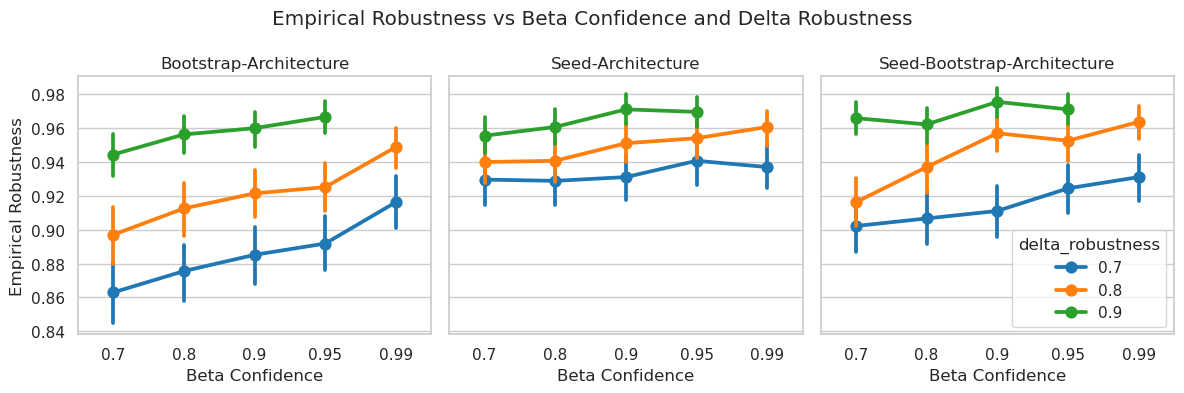

In [59]:
experiments = conf_sweep_raw_df['experiment_type'].unique()

fig, axes = plt.subplots(ncols=len(experiments), figsize=(12, 4), sharex=True, sharey=True)

for i, experiment in enumerate(experiments):
    
    tmp_conf_df = conf_sweep_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df['experiment_type'] == experiment]
    
    sns.pointplot(data=tmp_conf_df, 
                  x='beta_confidence', 
                  y='robust_counterfactual_validity_model2', 
                  hue='delta_robustness', 
                  ax=axes[i],
                  palette='tab10',
                  legend=True if i == len(experiments) - 1 else False
    )
    
    axes[i].set_title(experiment)
    axes[i].set_xlabel('Beta Confidence')
    if i == 0:
        axes[i].set_ylabel('Empirical Robustness')
        
    plt.suptitle('Empirical Robustness vs Beta Confidence and Delta Robustness')
    
plt.tight_layout()
plt.savefig(f'{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png', dpi=300, bbox_inches='tight')
    
   

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (confidence sweep)</div>

In [60]:
k_sweep_results_path = results_path + '/k_sweep'
k_raw_df = process_results(k_sweep_results_path)

Reading results: 100%|██████████| 1/1 [00:05<00:00,  5.12s/it]


In [61]:
k_raw_df['delta_robustness'].value_counts()

0.8    21600
0.9    21600
0.5    21600
0.6    21600
0.7    21600
Name: delta_robustness, dtype: int64

In [62]:
k_raw_df['k_mlps_in_B'].value_counts()

4     13500
16    13500
24    13500
8     13500
36    13500
44    13500
32    13500
40    13500
Name: k_mlps_in_B, dtype: int64

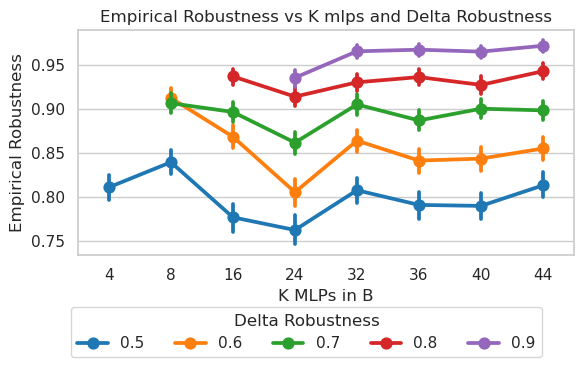

In [65]:
fig, axes = plt.subplots(figsize=(6, 4))

sns.pointplot(data=k_raw_df,
                x='k_mlps_in_B',
                y='robust_counterfactual_validity_model2',
                hue='delta_robustness',
                palette='tab10',
                ax=axes
)

plt.legend(title='Delta Robustness', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.title('Empirical Robustness vs K mlps and Delta Robustness')
plt.xlabel('K MLPs in B')
plt.ylabel('Empirical Robustness')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_empirical_robustness_vs_k_mlps.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [66]:
generalization_results_path = results_path + '/generalization'
gen_raw_df = process_results(generalization_results_path)

Reading results: 0it [00:00, ?it/s]


ValueError: No objects to concatenate

In [17]:
gen_raw_df['experiment_type'].value_counts()

Seed    10701
Name: experiment_type, dtype: int64

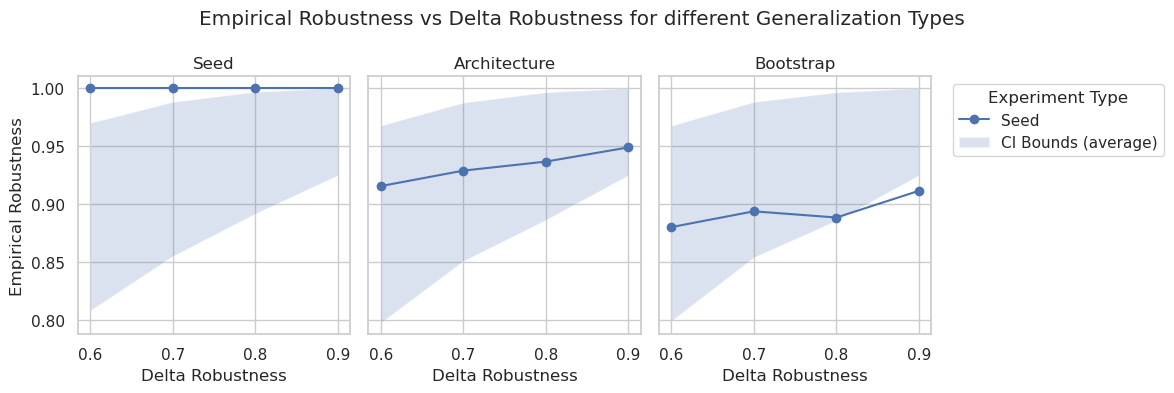

In [34]:
generalizations = gen_raw_df['experiment_generalization_type'].unique()
experiments = gen_raw_df['experiment_type'].unique()

fig, axes = plt.subplots(ncols=len(generalizations), figsize=(12, 4), sharex=True, sharey=True)

for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[(tmp_gen_df['experiment_type'] == experiment) & (tmp_gen_df['experiment_generalization_type'] == gen)]

        lbs = tmp_gen_df['lower_bound_beta']
        ubs = tmp_gen_df['upper_bound_beta']
        
        tmp_grp = tmp_gen_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()

        axes[i].plot(tmp_grp.index, tmp_grp, marker='o', linestyle='-', label=experiment)
        
        tmp_grp_lower = tmp_gen_df.groupby('delta_robustness')['lower_bound_beta'].mean()
        tmp_grp_upper = tmp_gen_df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        axes[i].fill_between(tmp_grp.index, tmp_grp_lower, tmp_grp_upper, alpha=0.2, label='CI Bounds (average)')
        
        axes[i].set_title(gen)
        axes[i].set_xlabel('Delta Robustness')
        
        if i == 0:
            axes[i].set_ylabel('Empirical Robustness')
            
        if i == len(generalizations) - 1:
            axes[i].legend(title='Experiment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        
            
plt.suptitle('Empirical Robustness vs Delta Robustness for different Generalization Types')

plt.tight_layout()

plt.savefig(f'{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png', dpi=300, bbox_inches='tight')
        

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

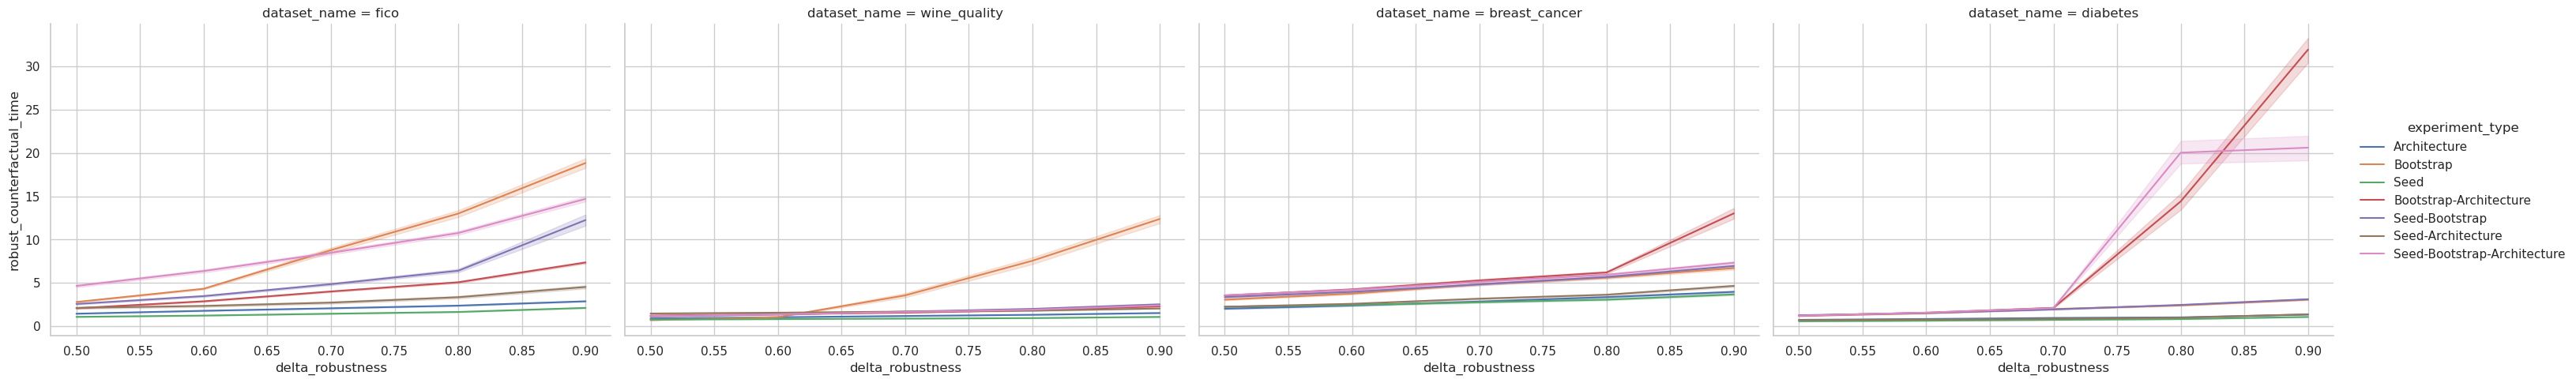

In [67]:
sns.relplot(data=raw_df, x='delta_robustness', y='robust_counterfactual_time', hue='experiment_type', col='dataset_name', kind='line', height=5, aspect=1.5)
# plt.xlabel('Delta Robustness')
# plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_1_robust_cf_generation_time_delta.png', dpi=300, bbox_inches='tight')

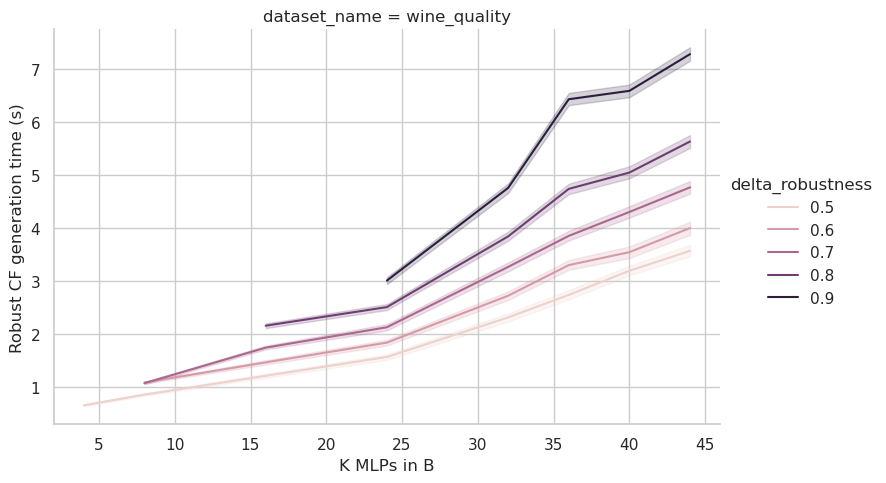

In [68]:
sns.relplot(data=k_raw_df, x='k_mlps_in_B', y='robust_counterfactual_time', hue='delta_robustness', col='dataset_name', kind='line', height=5, aspect=1.5)
plt.xlabel('K MLPs in B')
plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_2_robust_cf_generation_time_k.png', dpi=300, bbox_inches='tight')

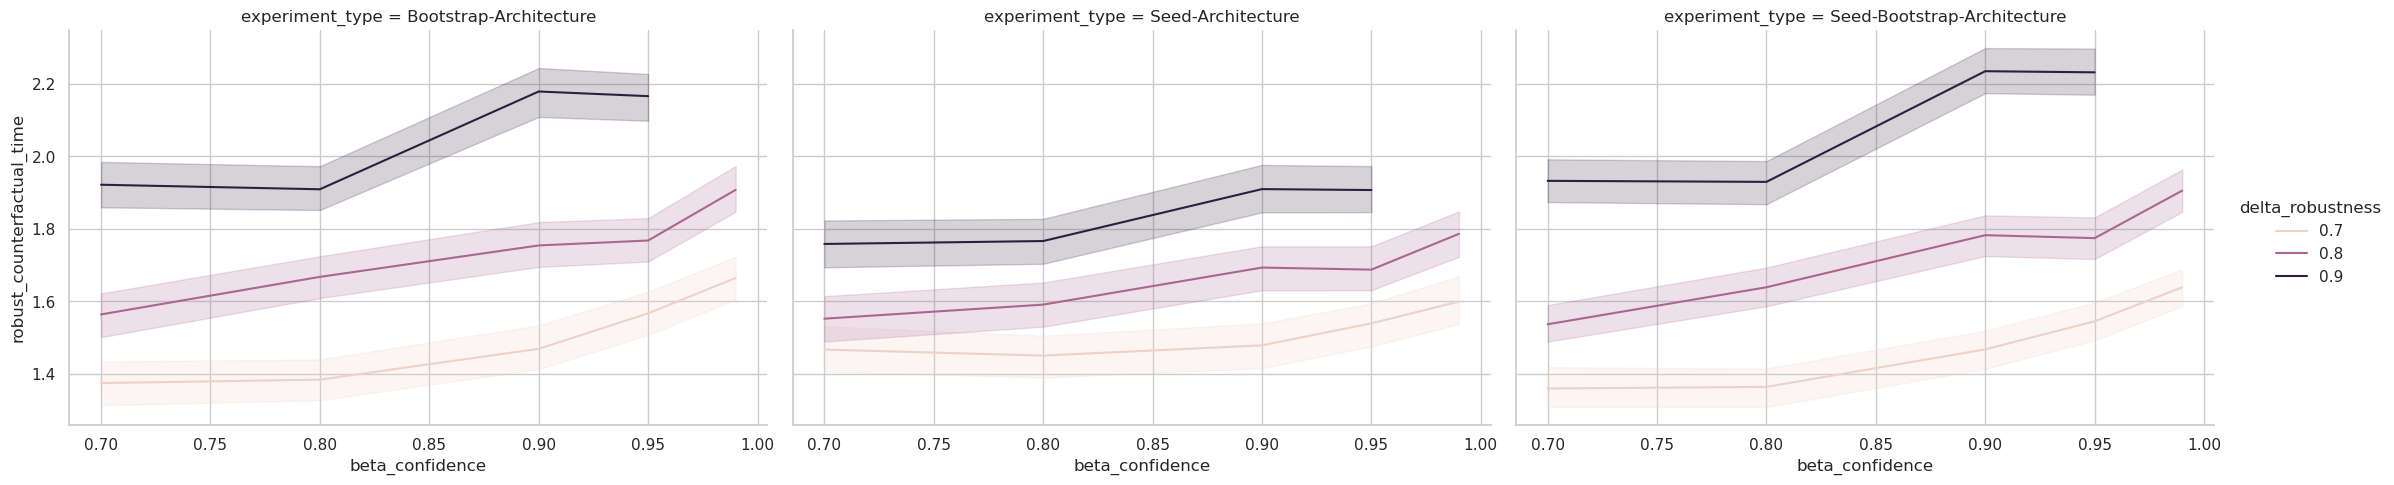

In [70]:
sns.relplot(data=conf_sweep_raw_df, x='beta_confidence', y='robust_counterfactual_time', hue='delta_robustness', col='experiment_type', kind='line', height=5, aspect=1.5)
plt.savefig(f'{images_dir}/5_3_robust_cf_generation_time_beta_confidence.png', dpi=300, bbox_inches='tight')

In [71]:
# Create a scatterplot time vs empirical robustness

# Print average time for each experiment type
print('BetaROB Time')
tmp_beta = raw_df[raw_df['experiment_type'] == 'Bootstrap-Architecture'] 
quantile80 = tmp_beta['robust_counterfactual_time'].quantile(0.8)
quantile20 = tmp_beta['robust_counterfactual_time'].quantile(0.2)
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] < quantile80]
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] > quantile20]
print(tmp_beta.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('RobX Time')
tmp_robx = robx_raw_df[robx_raw_df['experiment_type'] == 'Bootstrap-Architecture']
quantile80 = tmp_robx['robust_counterfactual_time'].quantile(0.8)
quantile20 = tmp_robx['robust_counterfactual_time'].quantile(0.2)
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] < quantile80]
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] > quantile20]
print(tmp_robx.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('Base CF Time')
tmp_base = raw_df[raw_df['experiment_type'] == 'Bootstrap-Architecture']
quntile80 = tmp_base['base_counterfactual_time'].quantile(0.8)
quantile20 = tmp_base['base_counterfactual_time'].quantile(0.2)
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] < quantile80]
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] > quantile20]
print(tmp_base.groupby(['experiment_type', 'dataset_name'])['base_counterfactual_time'].mean().sort_index())

BetaROB Time
experiment_type         dataset_name 
Bootstrap-Architecture  breast_cancer    3.256238
                        diabetes         2.677782
                        fico             3.252531
                        wine_quality     2.232091
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type         dataset_name 
Bootstrap-Architecture  breast_cancer    0.559444
                        fico             1.093544
                        wine_quality     0.818190
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type         dataset_name 
Bootstrap-Architecture  breast_cancer    0.007350
                        diabetes         0.003639
                        fico             0.007058
                        wine_quality     0.002796
Name: base_counterfactual_time, dtype: float64
